# Advanced droughts workflow

Click [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CLIMAAX/DROUGHTS/main?labpath=DROUGHTS_notebook_1.ipynb) to launch this workflow on MyBinder. 

# About droughts and droughts' risks

## What is a drought?

Simply stated, drought is ‘the extreme persistence of precipitation deficit over a specific region for a specific period of time’ $^1$. Droughts are often classified into three main types different by their severity, impacts, and time scales:

1. <ins>Meteorological drought</ins> is often caused by short-term precipitation deficiency and its impacts highly depend on its timing. For example, lack of rain during the sprouting phase in rain-fed agriculture could lead to crop failure. 
2. <ins>Agricultural drought</ins> is a medium-term phenomenon, characterized by reduced soil moisture content and is caused by a prolonged period of meterological drought. 
3. On the long-term, <ins>hydrological drought</ins> is characterized by lower stream flow, reduced water level in water bodies, and may affect groundwater storage. 

The cascade between drought types is goverened by the severity (i.e., magnitude), duration, and spatio-temporal distribution of drought events.

## What is drought risk?

Drought risk is a measure for quantifying the likelyhood of a meaningfull impact from drought-event(s)
on human population, its economic activity and assets, and the environment. The risk for an impact depends on the <ins>drought hazard</ins>, <ins>exposure</ins>, and the <ins>vulnerability</ins> to droughts. <ins>Hazard</ins> measures the magnitude, duration, and timing of drougt events. <ins>Exposure</ins> to droughts represent the spatial distribution of drought relative to distribution of potentially impactful systems, e.g., location of cultivated land, wetlands, etc. Finally, <ins>vulnerability</ins> stands for the level of impact expected for a given system during a given event, and is affected by the systems' intrinsic attributes. For example, fields with drought-resistent crops varities would be less vulnerable to droughts.


## How do we assess drought risk?

There are many different metrics to assess drought risk, which account for at least one of the risk factors: hazard, exposure and vulnerability.

This workflow quantifies drought risk as the product of drought hazard, exposure and vulnerability. The methodology used here was developed and applied globally by Carrão et al. (2016) $^2$. The result of this workflow is a risk map showing the relative drought risk of different spatial units (i.e., subnational administrative regions) from a larger region (i.e., the European Union). Regional drought risk scores are on a scale of 0 to 1, with 0 representing the lowest risk and 1 the highest. The workflows takes each risk determinant (i.e. hazard, exposure and vulnerability) and normalised it taking into account its maximum and minimum values across all sub-national administrative regions. Thus, the results of this drought risk workflow are relative to the sample of geographic regions used for normalisation. The proposed risk scale is not a measure of absolute losses or actual damage, but a relative comparison of drought risk between the input regions. Therefore, the resulting data and mapping can help users to assess in which sub-administrative units within a jurisdictions the drought risk is or will be higher, allowing for better resouce allocation and better coordination within and between different levels of government.

Below is a description of the data and tools used to calculate drought hazard, exposure and vulnerability, both for the historic period and for future scenarios, and the outputs of this workflow. 

For the future scenarios, we decided to follow the SSP-RCPs combinations as in the IPCC 6th assessment report (https://www.ipcc.ch/assessment-report/ar6/).

More expert users can find a more detailed and technical explanation on how hazard, exposure and vulnerability are quantified in the colored text boxes. 


## Datasets (historic and future projections)

In this workflow the following data is used:


#### Spatial units: 

We used GeoJSON maps of NUTS2 and NUTS3 regions to define the selected spacial units, which can be downloaded at this link https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/


### Hazard data and methods:

Drought hazard (dH) for a given region is estimated as the probability of exceedance the median of regional (e.g., EU level) severe precipitation deficits for an historical reference period (e.g. 1979-2019) or for a future projection period (e.g. 2015-2100).

For estimating drought hazard, this workflows requires monthly total precipitation for each NUTS2 or NUTS3 region during the historical reference period or future projection period. Usually, these are observation-based or simulated time-series of gridded precipitation data. In the historic workflow, we used GSWP3 and W5E5 global meteorological forcing data processed for ISIMIP3a, sets on a 0.5°x0.5°C global grid and at daily time steps for the historical period of 1979-2019 (https://doi.org/10.48364/ISIMIP.982724.2). For the future projections, we used the ISIMIP3b bias-adjusted atmospheric climate input data, available for 5 CMIP6 global climate models (GFDL-ESM4, IPSL-CM6A-LR, MPI-ESM1-2-HR, MRI-ESM2-0, UKESM1-0-LL), and three SSP-RCPs combinations (SSP126, SSP370, SSP585) (https://doi.org/10.48364/ISIMIP.842396.1). There is no minimum requirement for the length of the precipitation record in this workflow, but as individual drought events can last for months or even years, we recommend that at least several decades are included.

Processing these data is performed by applying Geographic Information System (GIS) techniques, to extract an aggregated value (e.g., total precipitation) of the data points located within each area of interest (e.g., NUTS2 region). Zonal statistics is widely used for that purpose, and it was the method used in our data processing.

Point, observation-based datasets are an alternative data source, usually collected by meteorological station networks. One can choose the data collected in one or more (e.g., average) representative station per area of interest to construct a NUTS2 level dataset. 

Our workflow expects a table where each row represents the total precipitation in mm for a month/year combination, and each column represents an area of interest (e.g. NUTS2 region). The first column contains the date in this format YYYY-MM-DD. The **title of the first columns has to be 'timing' and the rest of the titles have to be the codes of the areas of interest (e.g. NUTS2), which have to be identical to the codes as they appear in the NUTS2 or NUTS3 spatial data from the [European Commission](https://ec.europa.eu/eurostat/en/web/nuts/background)**.

A pre-processed table with precipitation data for European countries at NUTS3 level is already provided, which can be fed directly into the workflow (see sample_data folder).

Precipitation data are then analysed by calculating precipitation deficit events for each region and measuring their severity using the weighted anomaly of standardised precipitation (WASP) index. The result is a list of drought events and their severity for each selected region (e.g. NUTS3 regions) for the reference period, which is then compared with the median of severe precipitation deficits for the same period for all regions considered (e.g. EU level) to calculate the probability (dH) of each region being affected by a drought event (i.e. exceeding the EU median of severe precipitation deficits). For more details on the how the WASP index is calculated see the colored box below.

<div class="alert alert-block alert-warning">
<b>Quantifying drought hazard</b> 
Drought hazard (dH) for a given region is estimated as the probability of exceedance the median of regional (e.g., EU level) severe precipitation deficits for an specified time reference period (historic or future).

A severe precipitation deficity is calculated using the weighted anomaly of standardized precipitation (WASP) index. This index accounts for precipitation seasonal patterns and is computed by summing weighted and standardized monthly precipitation anomalies $^3$.

We use the weighted anomaly of standardized precipitation (WASP) index to define the severity of precipitation deficit. The WASP-index takes into account the annual seasonality of precipitation cycle and is computed by summing weighted standardized monthly precipitation anomalies (see Eq. 1). Where $P_{n,m}$ is each region's monthly precipitation, $T_m$ is a monthly treshold defining precipitation severity, and $T_A$ is an annual threshold for precipitation severity. The thresholds are defined by dividing multi-annual monthly observed rain using the 'Fisher-jenks' classigication algorithm $^4$. 

Eq. 1: $$WASP_j = \Sigma_{P_{n,m} < T_m}^{P_{n,m} >= T_m}( \frac{P_{n,m} - T_m}{T_m})*\frac{T_m}{T_A}$$
</div>

# Workflow implementation

### Load libraries

In this notebook we will use the following Python libraries:
- [os](https://docs.python.org/3/library/os.html) - To create directories and work with files
- [urllib](https://docs.python.org/3/library/urllib.html) - To access to online resources
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html) - To create and manage data frames (tables) in Python
- [geopandas](https://geopandas.org/en/stable/docs.html) - Extend pandas to store and manipulate spatial data
- [numpy](https://numpy.org/doc/stable/) - For basic math tools and operations
- [scipy](https://scipy.org/) - Provide advanced mathematical tools and optimization capacities 
- [jenkspy](https://github.com/mthh/jenkspy) - To apply Fisher-Jenks alogrithm 
- [json](https://docs.python.org/3/library/json.html) - To load, store and manipuilate JSON objects
- [pyproj](https://pyproj4.github.io/pyproj/stable/) - An interface to a geographic projections and transformations library
- [matplotlib](https://matplotlib.org/) - For plotting
- [plotly](https://plotly.com/python/) - For dynamic and interactive plotting
- [datetime](https://docs.python.org/3/library/datetime.html) - For handling dates in Python

In [1]:
# lOAD LIBRARIES
import os
import urllib
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy
import jenkspy
import json
import pyproj
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

# READ SCRIPTS
# adapted from https://github.com/metjush/envelopment-py/tree/master used for DEA 
from envelopmentpy.envelopment import *

# Function for calculating drought hazard indices
%run DROUGHTS_functions.ipynb


### Define working environment and global parameters
This workflow relies on pre-proceessed data. The user will define the path to the data folder and the code below would create a folder for outputs.


In [23]:
# Set working environment

workflow_folder = './sample_data_nuts3/'

# Define scenario 0: historic; 1: SSP1-2.6; 2: SSP3-7.0. 3: SSP5-8.5

scn = 1

# Define time (applicible only for the future): 0: near-future (2050); 1: far-future (2080)
time = 0

pattern = "historic"
pattern_h = "historic"
if scn != 0:
    pattern_h = ['ssp126', 'ssp370', 'ssp585'][scn - 1]
    pattern = ['ssp126', 'ssp370', 'ssp585'][scn - 1] + '_' + ['nf', 'ff'][time]
    

# debug if folder does not exist - issue an error to check path

# create outputs folder
if not os.path.exists(os.path.join(workflow_folder, 'outputs')):
    os.makedirs(os.path.join(workflow_folder, 'outputs'))

Load NUTS3 spatial data and define regions of interest

In [24]:
# load nuts3 spatial data
print('Load NUTS3 map with three sample regions')
json_nuts_path = 'https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_01M_2021_4326_LEVL_3.geojson'
nuts = load_nuts_json(json_nuts_path)

# set country = 0 to map all Europe
#nuts['NUTS_ID2'] = nuts['NUTS_ID'].str.slice(0,4)

print("Choose country code from: ", nuts['CNTR_CODE'].unique())


Load NUTS3 map with three sample regions
Choose country code from:  ['HR' 'DE' 'BG' 'AT' 'AL' 'BE' 'ES' 'CH' 'CZ' 'EL' 'FR' 'FI' 'EE' 'DK'
 'CY' 'HU' 'NL' 'NO' 'LV' 'LT' 'IS' 'MK' 'MT' 'IT' 'TR' 'PL' 'RO' 'SE'
 'RS' 'PT' 'IE' 'UK' 'ME' 'LU' 'SK' 'SI' 'LI']


## Choose country code:

In [25]:
ccode = "ES"

# validate country selection and subset regions
if not nuts['CNTR_CODE'].str.contains(ccode).any:
    print("Country code: ", ccode, " is not valid; please choose a valid country code.")
else:
    nuts = nuts.query('CNTR_CODE in @ccode')

regions = nuts['NUTS_ID']
    #print("List of nuts2: ", nuts['NUTS_ID2'].unique())

## Hazard workflow

### Loading precipitation data
Precipitation data is provided in the format required at the NUTS3 level for EU countries in the sample_data folder: file "drought_hazard.csv". See XX for details on how to prepare the input data for the hazard assessment.

In [26]:
# Load precipitation data
print("Analyzing drought hazard. This process may take few minutes...")
print('\n')
precip = pd.read_csv(os.path.join(workflow_folder, "drought_hazard_{}.csv".format(pattern_h)))
# convert timing column to datetime
precip['timing'] = pd.to_datetime(precip['timing'], format = '%Y-%m-%d') 
#'%b-%Y'

Analyzing drought hazard. This process may take few minutes...




Subset columns based on the regions selected above. Each column of the input precipitation data represent a NUTS3 region.

In [27]:
# col_subset aims to extract the relevant results

col_subset = list(precip.columns.str.contains(ccode))
col_subset[0] = True
precip = precip.loc[:, col_subset]

# clean NaN rows & missing columns
precip = precip.loc[~np.array(precip.isna().all(axis = 1)),:]

drop_regions = []

# missing data in columns
col_subset = np.array(precip.isna().all(axis = 0))
drop_regions += list(precip.columns[col_subset])
precip = precip.loc[:, ~col_subset]

# missing data column in data
col_subset =  np.isin(regions,precip.columns)
drop_regions += list(regions[~col_subset])
regions = regions[col_subset]
output = pd.DataFrame(regions, columns = ['NUTS_ID'])

# print head of the table
print("The following regions are dropped due to missing data: "+ str(drop_regions))
print('\n')
print('Input precipitation data (top 3 rows): ')
print(precip.head(3))

print('\n')

The following regions are dropped due to missing data: ['ES630', 'ES640', 'ES706', 'ES707', 'ES708', 'ES709', 'ES630', 'ES640', 'ES703', 'ES704', 'ES705']


Input precipitation data (top 3 rows): 
      timing     ES111     ES112     ES113     ES114     ES120     ES130  \
0 2020-01-31  0.000533  0.000505  0.000442  0.000404  0.000456  0.000269   
1 2020-02-29  0.000559  0.000511  0.000377  0.000361  0.000621  0.000416   
2 2020-03-31  0.000633  0.000585  0.000491  0.000458  0.000608  0.000379   

      ES211     ES212     ES213  ...     ES533     ES611     ES612     ES613  \
0  0.000124  0.000173  0.000146  ...  0.000030  0.000133  0.000273  0.000348   
1  0.000220  0.000294  0.000261  ...  0.000062  0.000168  0.000284  0.000432   
2  0.000189  0.000244  0.000228  ...  0.000034  0.000178  0.000281  0.000449   

      ES614     ES615     ES616     ES617     ES618     ES620  
0  0.000228  0.000318  0.000223  0.000278  0.000441  0.000155  
1  0.000328  0.000238  0.000328  0.000354  0.0004

### Visualize precipitation data

      timing     ES111     ES112     ES113     ES114     ES120     ES130  \
0 2020-01-31  0.000533  0.000505  0.000442  0.000404  0.000456  0.000269   
1 2020-02-29  0.000559  0.000511  0.000377  0.000361  0.000621  0.000416   
2 2020-03-31  0.000633  0.000585  0.000491  0.000458  0.000608  0.000379   

      ES211     ES212     ES213  ...     ES611     ES612     ES613     ES614  \
0  0.000124  0.000173  0.000146  ...  0.000133  0.000273  0.000348  0.000228   
1  0.000220  0.000294  0.000261  ...  0.000168  0.000284  0.000432  0.000328   
2  0.000189  0.000244  0.000228  ...  0.000178  0.000281  0.000449  0.000318   

      ES615     ES616     ES617     ES618     ES620  Regional_mean  
0  0.000318  0.000223  0.000278  0.000441  0.000155       0.000257  
1  0.000238  0.000328  0.000354  0.000453  0.000242       0.000302  
2  0.000349  0.000335  0.000324  0.000518  0.000253       0.000317  

[3 rows x 52 columns]


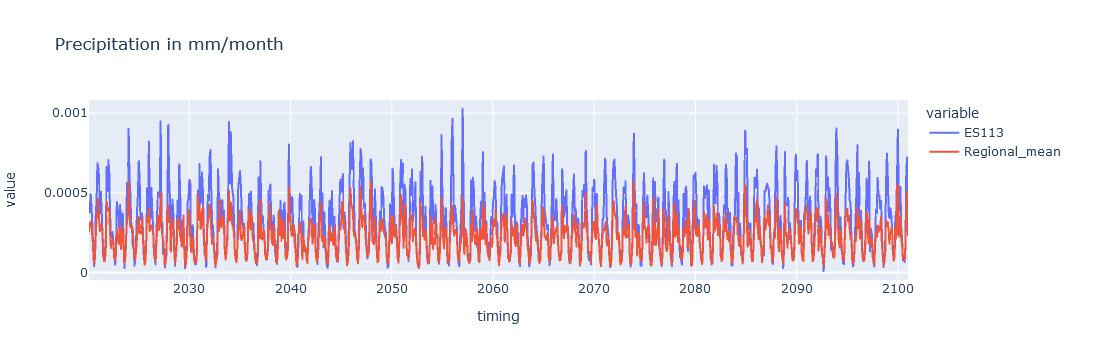

In [30]:
df = precip
#if ccode is only for one region
df['Regional_mean']=df.drop('timing', axis=1).mean(axis=1) #create regional mean
print(df.head(3))


# print line chart
fig = px.line(df, x='timing', y=['ES113', 'Regional_mean'], title='Precipitation in mm/month') 
fig.show()


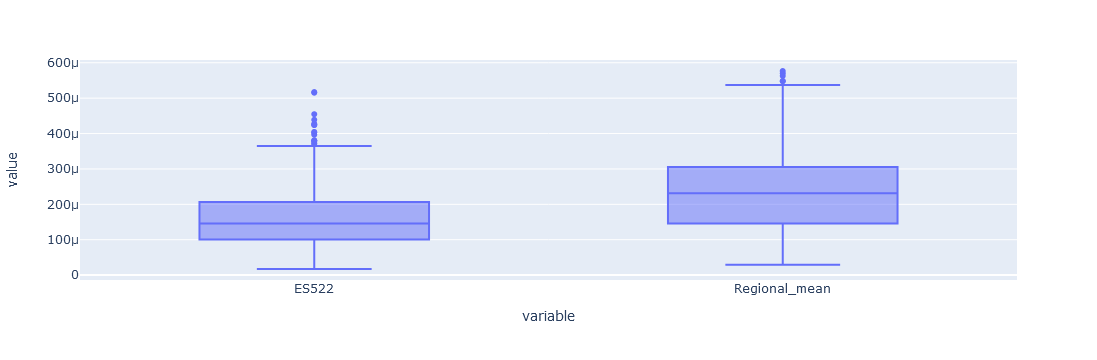

In [31]:
# print box plots
#select which regions to compare, or the calculated monthly regional mean

fig2 = px.box(df, y=['ES522', 'Regional_mean'])
fig2.show()


### Calculate WASP Index (Weighted Anomaly Standardized Precipitation) monthly threshold
For more details on the WASP index, see XX.

In [28]:
# create empty arrays and tables for intermediate and final results
WASP = []
WASP_global = []
drought_class = precip.copy()

# prepare output for drought event index - WASP_j- list of lists wasp = [[rid1], [rid2], ...]
for i in range(1, len(precip.columns)):
    
   
    # For every NUTS3 out of all regions - do the following:
    
    # empty array for the monthly water deficit thresholds
    t_m = []
    for mon_ in range(1, 13):
        # For every month out of all all months (January, ..., December) - do the following:
        
        # calculcate monthly drought threshold -\
            # using a division of the data into to clusters with the Jenks' (Natural breaks) algorithm
        r_idx = precip.index[precip.timing.dt.month == mon_].tolist()
        t_m_last = jenkspy.jenks_breaks(precip.iloc[r_idx, i], n_classes = 2)[1]
        t_m.append(t_m_last)
        
        # Define every month with water deficity (precipitation < threshold) as a drought month
        drought_class.iloc[r_idx, i] = (drought_class.iloc[r_idx, i] < t_m_last).astype(int)

    # calculate annual water deficit threshold
    t_a = sum(t_m)
    
    # calculate droughts' magnitude and duration using the WASP indicator
    WASP_tmp = []
    first_true=0
    index = []
    for k in range(1, len(precip)):
        # for evary row (ordered month-year combinations):
            # check if droguht month -> calculate drought accumulated magnitude (over 1+ months)
        if drought_class.iloc[k, i]== 1:
            # In case of a drought month.
            # calculate monthly WASP index
            index = int(drought_class.timing.dt.month[k] - 1)
            # WASP monthly index: [(precipitation - month_threshold)/month_threshold)]*[month_threshold/annual_treshold]
            WASP_last=((precip.iloc[k,i] - t_m[index])/t_m[index])* (t_m[index]/t_a)
            
            if first_true==0:
                # if this is the first month in a drought event:
                # append calculated monthly wasp to WASP array.
                WASP_tmp.append(WASP_last)
                first_true=1
            else:
                # if this is NOT the first month in a drought event:
                # add the calculated monthly wasp to last element in the WASP array (accumulative drought).
                WASP_tmp[-1]=WASP_tmp[-1] + WASP_last
            WASP_global.append(WASP_last)
        else:
            # check if not drought month - do not calculate WASP
            first_true=0
    WASP.append(np.array(WASP_tmp))

In [56]:
WASP = np.array(WASP, dtype=object)
s = []
# prepare output table
WASP_table = pd.DataFrame(regions, columns = ['NUTS_ID'])

for i in range(WASP.shape[0]):
    s.append(round(np.nansum(WASP[i]) / len(WASP[i]), 3))

WASP_table['WASP'] = s


print("NUTS2 with the lowest WASP (TOP 15): ")
print(WASP_table.sort_values(by=['WASP'], ascending = True).head(15))


NUTS2 with the lowest WASP (TOP 15): 
                NUTS_ID   WASP
Location                      
ES: Gipuzkoa      ES212 -0.088
ES: Ciudad Real   ES422 -0.083
ES: Albacete      ES421 -0.081
ES: Valladolid    ES418 -0.081
ES: Teruel        ES242 -0.077
ES: Cantabria     ES130 -0.076
ES: Ávila         ES411 -0.074
ES: Murcia        ES620 -0.074
ES: Málaga        ES617 -0.073
ES: Pontevedra    ES114 -0.068
ES: Araba/Álava   ES211 -0.068
ES: Segovia       ES416 -0.067
ES: Salamanca     ES415 -0.065
ES: Cuenca        ES423 -0.064
ES: La Rioja      ES230 -0.064


In [58]:
#create a group column for the NUTS2 regions
WASP_table['NUTS2'] = WASP_table['NUTS_ID'].str.slice(0,4)

#create another column with True if the region is within the focal area and False if it is not
WASP_table['focal_area']=WASP_table['NUTS2'] =='ES51'



Histogram of WASP index at NUTS3 level for all units in a given country. Selected NUTS2 (focal area) is colored blue:


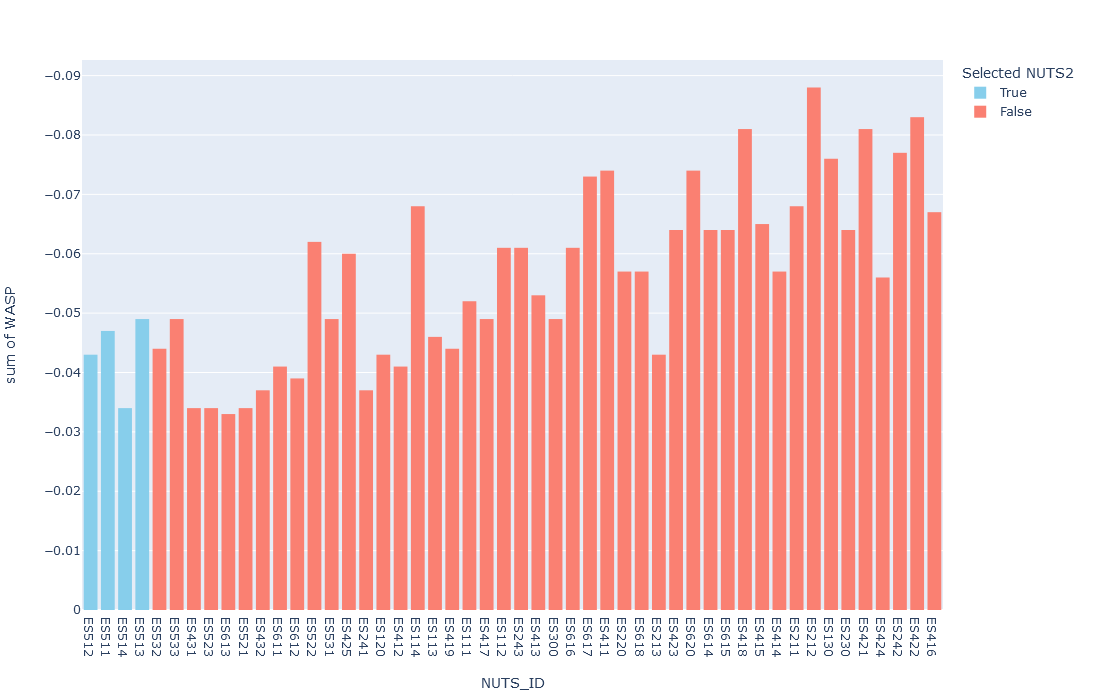

In [66]:
print('\n')
print('Histogram of WASP index at NUTS3 level for all units in a given country. Selected NUTS2 (focal area) is colored blue:')


fig2 = px.histogram(WASP_table, y='WASP',\
                     x='NUTS_ID',\
                     color='focal_area',\
                     color_discrete_map={True:'skyblue', False: 'salmon'})
                    
fig2.update_layout(
legend = dict(title = "Selected NUTS2"),
height = 700)

fig2['layout']['yaxis']['autorange'] = "reversed"

fig2.show()

print('\n')




Line chart for historic and future relative drought risk in the focal area (NUTS2)


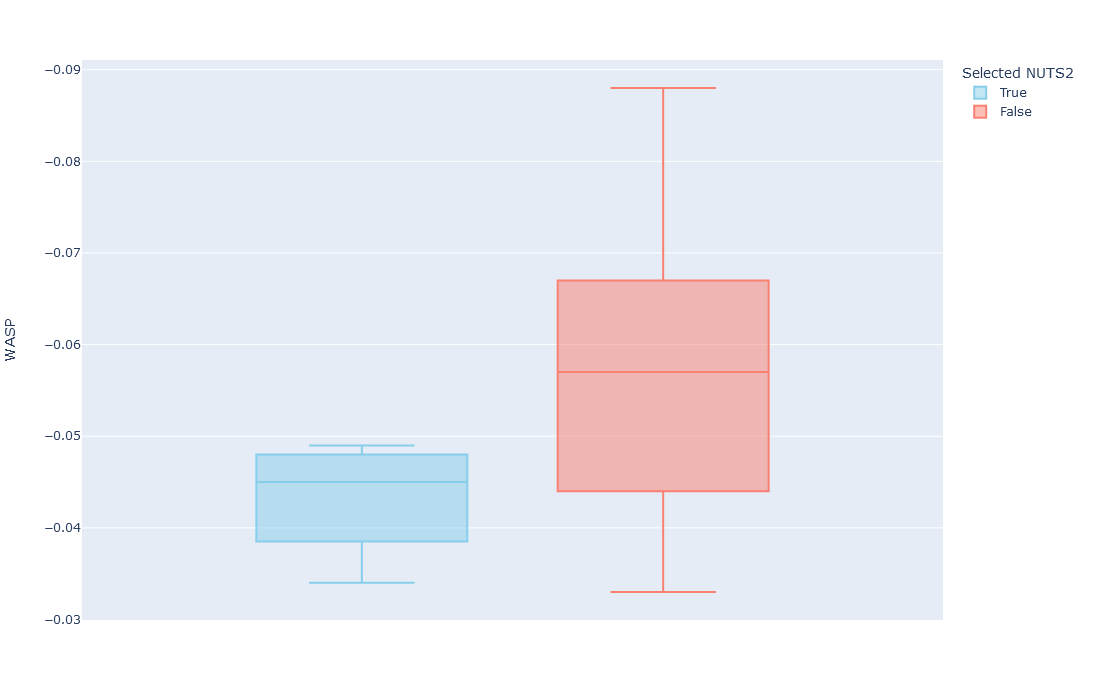

In [71]:
print('\n')
print('Boxplot comparing WASP index in the focal area (NUTS2)')


fig3 = px.box(WASP_table, y='WASP', color='focal_area',\
                     color_discrete_map={True:'skyblue', False: 'salmon'}
)

fig3.update_layout(
legend = dict(title = "Selected NUTS2"),
height = 700)

fig3['layout']['yaxis']['autorange'] = "reversed"

fig3.show()

print('\n')

### Calculate the exceedance probability from the median global WASP of each region as the Hazard index (dH)

In [ ]:
dH = []
WASP = np.array(WASP, dtype=object)

# calculate global median deficit severity - 
    # set drought hazard (dH) as the probability of exceeding the global median water deficit.

median_global_wasp = np.nanmedian(WASP_global)

# calculate dH per region i
for i in range(WASP.shape[0]):
    # The more negative the WASP index, the more severe is the deficit event, so 
    # probability of exceedence the severity is 1 - np.nansum(WASP[i] >= median_global_wasp) / len(WASP[i])
    dH.append(round(1 - np.nansum(WASP[i] >= median_global_wasp) / len(WASP[i]), 3))

output['hazard_raw'] = dH
print('>>>>> Drought hazard is completed.')

## Conclusions

The above workflow estimates the relative drought risk of European NUTS2 regions as the product of drought hazard, exposure, and vulnerability. It results in relative drought risk classes ranging between 1 (low risk, 0 -0.2 risk) to 5 (high risk, 0.8 -1).
The European drought risk map shows hotspots with higher drought risk (class 2 -3) in Southern Spain, Northern France, Italy, Hungary, Serbia, and Romania. In the Northern parts of Europe, higher drought risk is shown in Poland, North Germany, Denmark, and parts of the Netherlands and Belgium.

Half of the NUTS2 units' hazard scores are high, ranging between 0.73 -0.8. The vulnerability is also relatively homogenous across the region, as half of the NUTS2 units range between 0.8 -0.88. The Balkan is the most vulnerable region having a minimum vulnerability score of 0.89. It means that the overall drought risk is limited mainly by exposure, which do not exceed 0.43 for 75% of the NUTS2 units.

A comparison with published literature$^2$ overall approves the current drought risk map. Although some discrepancies are evident, particularly in NUTS2 units in the Netherlands and Belgium, they may be associated with differences in precipitation data, temporal coverage, spatial resolution, and spatial coverage. Though different input data largely result in consistent drought hazard estimates, it may lead to local discrepancies in different regions (e.g., Central and Northern Europe)$^6$.

## Contributors
The workflow has beend developed by [Silvia Artuso](https://iiasa.ac.at/staff/silvia-artuso) and [Dor Fridman](https://iiasa.ac.at/staff/dor-fridman) from [IIASA's Water Security Research Group](https://iiasa.ac.at/programs/biodiversity-and-natural-resources-bnr/water-security), and supported by [Michaela Bachmann](https://iiasa.ac.at/staff/michaela-bachmann) from [IIASA's Systemic Risk and Reslience Research Group](https://iiasa.ac.at/programs/advancing-systems-analysis-asa/systemic-risk-and-resilience).

## References

[1] Zargar, A., Sadiq, R., Naser, B., & Khan, F. I. (2011). A review of drought indices. *Environmental Reviews*, 19: 333-349.

[2] Carrão, H., Naumann, G., & Barbosa, P. (2016). Mapping global patterns of drought risk: An empirical framework based on sub-national estimates of hazard, exposure and vulnerability. *Global Environmental Change*, 39, 108-124.

[3] Lyon, B., & Barnston, A. G. (2005). ENSO and the spatial extent of interannual precipitation extremes in tropical land areas. *Journal of climate*, 18(23), 5095-5109.

[4] Carrão, H., Singleton, A., Naumann, G., Barbosa, P., & Vogt, J. V. (2014). An optimized system for the classification of meteorological drought intensity with applications in drought frequency analysis. *Journal of Applied Meteorology and Climatology*, 53(8), 1943-1960.

[5] Sherman, H. D., & Zhu, J. (2006). Service productivity management: Improving service performance using data envelopment analysis (DEA). Springer science & business media.

[6] Carrão, H., Naumann, G. & Barbosa, P. (2018). Global projections of drought hazard in a warming climate: a prime for disaster risk management. *Clim Dyn* 50: 2137–2155.
